# Trading Tools Tutorial: Technical Analysis with Python

This notebook demonstrates various technical analysis tools used in trading, including trend lines, channels, and pitchforks. We'll create interactive visualizations to show how each tool works with real market data examples.

## Table of Contents
1. **Lines**: Trend Line, Ray, Info Line, Extended Line, Trend Angle, Horizontal Line, Horizontal Ray, Vertical Line, Cross Line
2. **Channels**: Parallel Channel, Regression Trend, Flat Top/Bottom, Disjoint Channel  
3. **Pitchforks**: Advanced three-point analysis tool
4. **Practical Examples**: Real-world applications and trading strategies

In [27]:
# Install Required Packages
# Run this cell first if you don't have the required packages installed

import subprocess
import sys
import importlib

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade"])
        print(f"✅ Successfully installed {package}")
        return True
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install {package}: {e}")
        return False

def check_package(package_name, import_name=None):
    """Check if a package is installed and importable"""
    if import_name is None:
        import_name = package_name.split('>=')[0].split('==')[0]
    
    try:
        importlib.import_module(import_name)
        return True
    except ImportError:
        return False

# List of required packages with their import names
required_packages = [
    ("pandas", "pandas"),
    ("numpy", "numpy"), 
    ("matplotlib", "matplotlib"),
    ("plotly", "plotly"),
    ("scipy", "scipy"),
    ("seaborn", "seaborn"),
    ("nbformat>=4.2.0", "nbformat"),
    ("ipython", "IPython"),
    ("kaleido", "kaleido")
]

print("🔄 Checking and installing required packages...")
print("=" * 60)

all_installed = True
for package, import_name in required_packages:
    if check_package(package, import_name):
        print(f"✅ {import_name} is already installed")
    else:
        print(f"📦 Installing {package}...")
        if not install_package(package):
            all_installed = False

if all_installed:
    print("\n🎉 All packages are ready!")
else:
    print("\n⚠️ Some packages failed to install. You may need to:")
    print("   1. Restart your kernel (Ctrl+Shift+P → 'Python: Restart Kernel')")
    print("   2. Run this cell again")
    print("   3. Or install manually: pip install plotly nbformat>=4.2.0 kaleido")

print("\n📋 Next steps:")
print("1. Run the import cell (Cell 3)")
print("2. Run the data generation cell (Cell 4)")
print("3. Then run the analysis cells")

🔄 Checking and installing required packages...
✅ pandas is already installed
✅ numpy is already installed
✅ matplotlib is already installed
✅ plotly is already installed
✅ scipy is already installed
✅ seaborn is already installed
✅ nbformat is already installed
✅ IPython is already installed
✅ kaleido is already installed

🎉 All packages are ready!

📋 Next steps:
1. Run the import cell (Cell 3)
2. Run the data generation cell (Cell 4)
3. Then run the analysis cells


In [28]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Import Plotly with error handling
try:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.express as px
    import plotly.io as pio
    
    # Configure Plotly for better notebook compatibility
    try:
        # Try different renderers in order of preference
        pio.renderers.default = "notebook_connected"
    except:
        try:
            pio.renderers.default = "notebook"
        except:
            try:
                pio.renderers.default = "colab"
            except:
                try:
                    pio.renderers.default = "browser"
                except:
                    pio.renderers.default = "json"
                    print("⚠️ Using basic JSON renderer for Plotly charts")
    
    print("✅ Plotly imported successfully")
    PLOTLY_AVAILABLE = True
    
except ImportError as e:
    print(f"⚠️ Plotly import failed: {e}")
    print("📝 Charts will use matplotlib instead")
    PLOTLY_AVAILABLE = False

# Import other scientific libraries
try:
    from scipy import stats
    print("✅ SciPy imported successfully")
except ImportError:
    print("⚠️ SciPy not available - some statistical features will be limited")
    stats = None

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

print("🎯 Libraries loaded! Ready to create trading analysis charts.")

✅ Plotly imported successfully
✅ SciPy imported successfully
🎯 Libraries loaded! Ready to create trading analysis charts.


In [29]:
# Generate Sample Market Data
def generate_sample_data(days=100, start_price=100):
    """Generate realistic stock price data with trends and volatility"""
    np.random.seed(42)
    dates = pd.date_range(start='2024-01-01', periods=days, freq='D')
    
    # Create base trend with some randomness
    trend = np.linspace(0, 20, days)
    noise = np.cumsum(np.random.normal(0, 2, days))
    cyclical = 5 * np.sin(np.linspace(0, 4*np.pi, days))
    
    # Generate OHLC data
    close_prices = start_price + trend + noise + cyclical
    high_prices = close_prices + np.abs(np.random.normal(0, 1.5, days))
    low_prices = close_prices - np.abs(np.random.normal(0, 1.5, days))
    open_prices = close_prices + np.random.normal(0, 0.5, days)
    volume = np.random.randint(1000000, 5000000, days)
    
    return pd.DataFrame({
        'Date': dates,
        'Open': open_prices,
        'High': high_prices,
        'Low': low_prices,
        'Close': close_prices,
        'Volume': volume
    })

# Generate our sample data
data = generate_sample_data(150)
print("Sample Data Generated:")
print(data.head())
print(f"\nData shape: {data.shape}")
print(f"Date range: {data['Date'].min()} to {data['Date'].max()}")

Sample Data Generated:
        Date        Open        High         Low       Close   Volume
0 2024-01-01  100.962089  101.369168   99.749936  100.993428  4160110
1 2024-01-02  101.749890  101.791991  100.432047  101.272318  4230019
2 2024-01-03  102.627257  104.140157  101.999180  103.120120  3460491
3 2024-01-04  106.964661  107.061018  105.797082  106.712638  2707692
4 2024-01-05  106.516762  107.221500  106.750539  106.781891  2331329

Data shape: (150, 6)
Date range: 2024-01-01 00:00:00 to 2024-05-29 00:00:00


# 📈 LINES - Technical Analysis Tools

Lines are the foundation of technical analysis. They help identify trends, support/resistance levels, and key price points.

In [30]:
# 1. TREND LINE (Alt + T)
def plot_trend_line():
    """Demonstrate trend line analysis"""
    if not PLOTLY_AVAILABLE:
        return plot_trend_line_matplotlib()
    
    fig = go.Figure()
    
    # Plot candlestick chart
    fig.add_trace(go.Candlestick(
        x=data['Date'],
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'],
        name='Price',
        increasing_line_color='green',
        decreasing_line_color='red'
    ))
    
    # Add uptrend line (connecting lows)
    trend_points_x = [data['Date'].iloc[10], data['Date'].iloc[50], data['Date'].iloc[90]]
    trend_points_y = [data['Low'].iloc[10], data['Low'].iloc[50], data['Low'].iloc[90]]
    
    # Calculate trend line
    slope, intercept = np.polyfit(range(len(trend_points_x)), trend_points_y, 1)
    trend_line_y = [slope * i + intercept for i in range(len(trend_points_x))]
    
    fig.add_trace(go.Scatter(
        x=trend_points_x,
        y=trend_line_y,
        mode='lines',
        name='Uptrend Line',
        line=dict(color='blue', width=2, dash='solid')
    ))
    
    # Add downtrend line (connecting highs)
    down_points_x = [data['Date'].iloc[20], data['Date'].iloc[60], data['Date'].iloc[100]]
    down_points_y = [data['High'].iloc[20], data['High'].iloc[60], data['High'].iloc[100]]
    
    slope2, intercept2 = np.polyfit(range(len(down_points_x)), down_points_y, 1)
    down_trend_y = [slope2 * i + intercept2 for i in range(len(down_points_x))]
    
    fig.add_trace(go.Scatter(
        x=down_points_x,
        y=down_trend_y,
        mode='lines',
        name='Resistance Line',
        line=dict(color='orange', width=2, dash='dash')
    ))
    
    fig.update_layout(
        title='📈 Trend Line Analysis<br><sub>Connect significant highs (resistance) or lows (support)</sub>',
        xaxis_title='Date',
        yaxis_title='Price ($)',
        template='plotly_white',
        height=500
    )
    
    return fig

def plot_trend_line_matplotlib():
    """Matplotlib fallback for trend line analysis"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot price data as line chart
    ax.plot(data['Date'], data['Close'], label='Close Price', color='blue', linewidth=1)
    ax.fill_between(data['Date'], data['Low'], data['High'], alpha=0.3, color='lightgray', label='High-Low Range')
    
    # Add uptrend line (connecting lows)
    trend_points_x = [data['Date'].iloc[10], data['Date'].iloc[50], data['Date'].iloc[90]]
    trend_points_y = [data['Low'].iloc[10], data['Low'].iloc[50], data['Low'].iloc[90]]
    
    ax.plot(trend_points_x, trend_points_y, color='green', linewidth=2, linestyle='-', label='Uptrend Line')
    
    # Add downtrend line (connecting highs)
    down_points_x = [data['Date'].iloc[20], data['Date'].iloc[60], data['Date'].iloc[100]]
    down_points_y = [data['High'].iloc[20], data['High'].iloc[60], data['High'].iloc[100]]
    
    ax.plot(down_points_x, down_points_y, color='red', linewidth=2, linestyle='--', label='Resistance Line')
    
    ax.set_title('📈 Trend Line Analysis\nConnect significant highs (resistance) or lows (support)', fontsize=14)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return fig

trend_fig = plot_trend_line()

# Try different rendering methods for better compatibility
if PLOTLY_AVAILABLE:
    try:
        trend_fig.show()
    except Exception as e:
        print(f"⚠️ Interactive display failed: {e}")
        print("📊 Displaying chart as static image instead...")
        try:
            # Try to display as static image
            import plotly.io as pio
            pio.show(trend_fig, renderer="png")
        except:
            try:
                # Fallback to browser
                pio.show(trend_fig, renderer="browser")
            except:
                print("💡 Please install missing packages by running Cell 2 first, then restart the kernel.")
                print("Alternative: View the chart by copying this code to a local Python environment.")

print("💡 TREND LINE USAGE:")
print("• Uptrend Line: Connect 2+ significant lows - acts as support")
print("• Downtrend Line: Connect 2+ significant highs - acts as resistance") 
print("• More touches = stronger the trend line")
print("• Break of trend line often signals trend reversal")

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Displaying chart as static image instead...
💡 TREND LINE USAGE:
• Uptrend Line: Connect 2+ significant lows - acts as support
• Downtrend Line: Connect 2+ significant highs - acts as resistance
• More touches = stronger the trend line
• Break of trend line often signals trend reversal


⚠️ Vertical line display issue: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`
⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using matplotlib fallback...


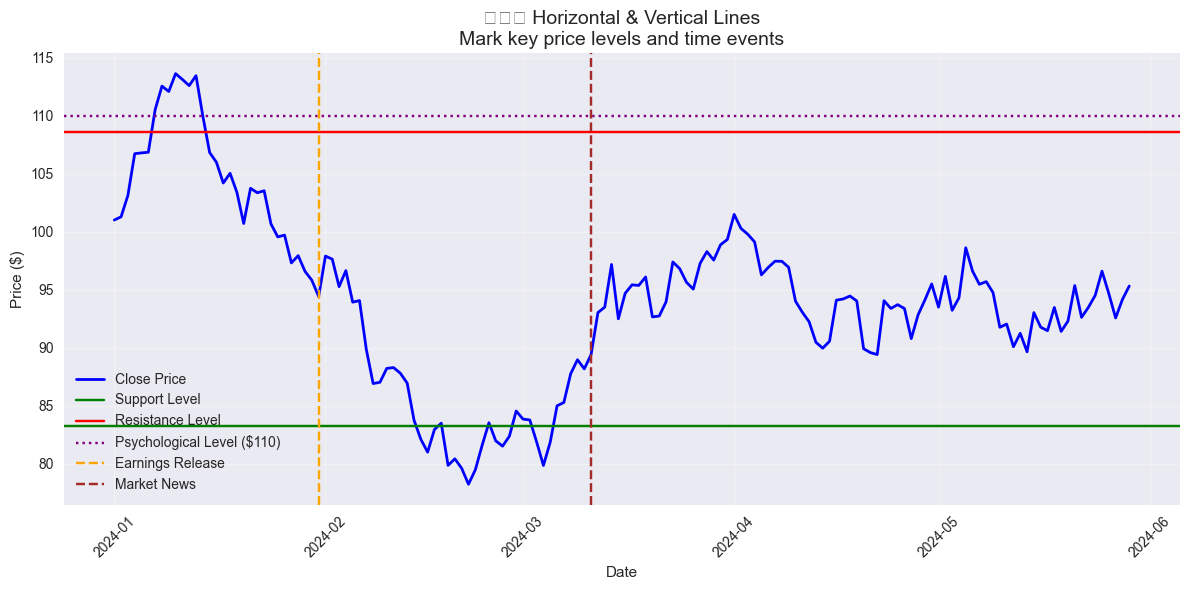

💡 HORIZONTAL LINES USAGE:
• Mark significant support/resistance levels
• Draw at swing highs/lows, psychological levels (round numbers)
• Price tends to react when approaching these levels

💡 VERTICAL LINES USAGE:
• Mark important time events (earnings, news, economic data)
• Help correlate price movements with specific events
• Useful for marking trading session opens/closes


In [32]:
# 2. HORIZONTAL & VERTICAL LINES (Alt + H, Alt + V)
def plot_horizontal_vertical_lines():
    """Demonstrate horizontal and vertical line analysis"""
    if not PLOTLY_AVAILABLE:
        return plot_horizontal_vertical_lines_matplotlib()
    
    fig = go.Figure()
    
    # Plot the price data
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=data['Close'],
        mode='lines',
        name='Close Price',
        line=dict(color='blue', width=2)
    ))
    
    # Add horizontal support/resistance lines
    support_level = data['Close'].min() + 5
    resistance_level = data['Close'].max() - 5
    psychological_level = 110  # Round number
    
    fig.add_hline(
        y=support_level,
        line_dash="solid",
        line_color="green",
        annotation_text="Support Level",
        annotation_position="bottom right"
    )
    
    fig.add_hline(
        y=resistance_level,
        line_dash="solid", 
        line_color="red",
        annotation_text="Resistance Level",
        annotation_position="top right"
    )
    
    fig.add_hline(
        y=psychological_level,
        line_dash="dot",
        line_color="purple",
        annotation_text="Psychological Level ($110)",
        annotation_position="top left"
    )
    
    # Add vertical lines for important events - convert to string to avoid timestamp issues
    earnings_date = data['Date'].iloc[30]
    news_date = data['Date'].iloc[70]
    
    try:
        fig.add_vline(
            x=earnings_date,
            line_dash="dash",
            line_color="orange",
            annotation_text="Earnings Release"
        )
        
        fig.add_vline(
            x=news_date,
            line_dash="dash",
            line_color="brown",
            annotation_text="Market News"
        )
    except Exception as e:
        print(f"⚠️ Vertical line display issue: {e}")
        # Add vertical lines using shapes instead
        fig.add_shape(
            type="line",
            x0=earnings_date, x1=earnings_date,
            y0=0, y1=1,
            yref="paper",
            line=dict(color="orange", width=2, dash="dash")
        )
        fig.add_annotation(
            x=earnings_date, y=data['Close'].max(),
            text="Earnings Release",
            showarrow=True,
            arrowhead=2,
            arrowcolor="orange"
        )
    
    fig.update_layout(
        title='➖⬆️ Horizontal & Vertical Lines<br><sub>Mark key price levels and time events</sub>',
        xaxis_title='Date',
        yaxis_title='Price ($)',
        template='plotly_white',
        height=500
    )
    
    return fig

def plot_horizontal_vertical_lines_matplotlib():
    """Matplotlib fallback for horizontal and vertical lines"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the price data
    ax.plot(data['Date'], data['Close'], label='Close Price', color='blue', linewidth=2)
    
    # Add horizontal lines
    support_level = data['Close'].min() + 5
    resistance_level = data['Close'].max() - 5
    psychological_level = 110
    
    ax.axhline(y=support_level, color='green', linestyle='-', label='Support Level')
    ax.axhline(y=resistance_level, color='red', linestyle='-', label='Resistance Level')
    ax.axhline(y=psychological_level, color='purple', linestyle=':', label='Psychological Level ($110)')
    
    # Add vertical lines
    earnings_date = data['Date'].iloc[30]
    news_date = data['Date'].iloc[70]
    
    ax.axvline(x=earnings_date, color='orange', linestyle='--', label='Earnings Release')
    ax.axvline(x=news_date, color='brown', linestyle='--', label='Market News')
    
    ax.set_title('➖⬆️ Horizontal & Vertical Lines\nMark key price levels and time events', fontsize=14)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return fig

# Try both versions with error handling
try:
    horiz_vert_fig = plot_horizontal_vertical_lines()
    if PLOTLY_AVAILABLE:
        try:
            horiz_vert_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using matplotlib fallback...")
            plot_horizontal_vertical_lines_matplotlib()
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using matplotlib fallback...")
    plot_horizontal_vertical_lines_matplotlib()

print("💡 HORIZONTAL LINES USAGE:")
print("• Mark significant support/resistance levels")
print("• Draw at swing highs/lows, psychological levels (round numbers)")
print("• Price tends to react when approaching these levels")
print("\n💡 VERTICAL LINES USAGE:")
print("• Mark important time events (earnings, news, economic data)")
print("• Help correlate price movements with specific events")
print("• Useful for marking trading session opens/closes")

# 📊 CHANNELS - Advanced Pattern Recognition

Channels help identify price ranges, trending patterns, and potential breakout points.

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using matplotlib fallback...


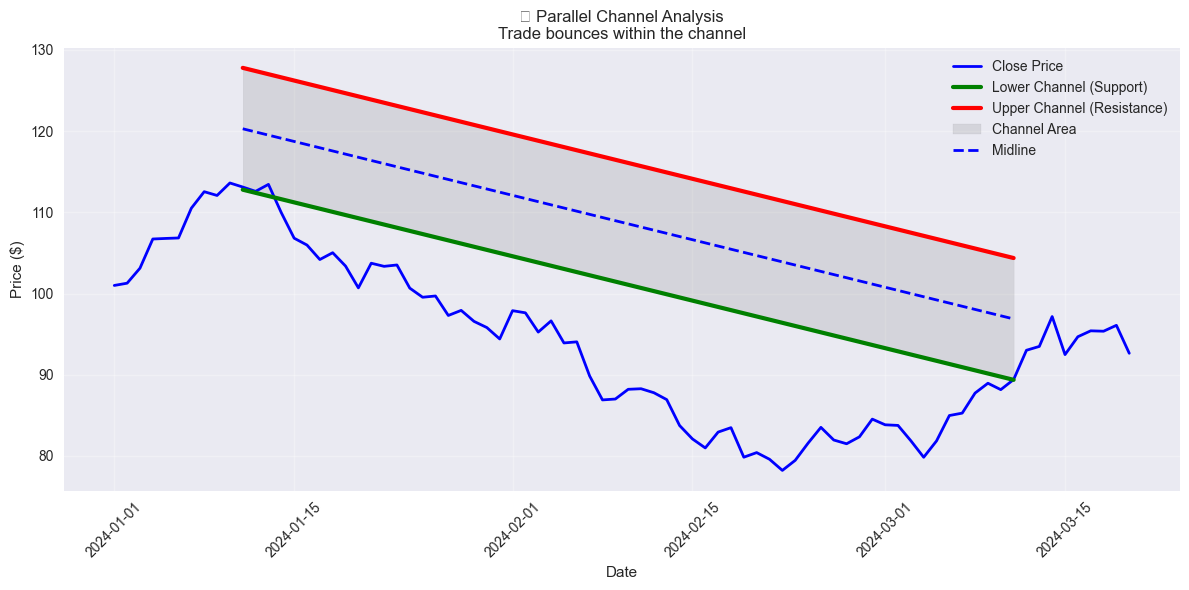

💡 PARALLEL CHANNEL STRATEGY:
• Buy near the lower channel line (support)
• Sell near the upper channel line (resistance)
• Watch for breakouts above/below the channel
• Midline often acts as dynamic support/resistance
• Volume should confirm breakouts


In [34]:
# 3. PARALLEL CHANNEL
def plot_parallel_channel():
    """Demonstrate parallel channel analysis"""
    fig = go.Figure()
    
    # Plot candlestick chart
    fig.add_trace(go.Candlestick(
        x=data['Date'][:80],  # Focus on first 80 days
        open=data['Open'][:80],
        high=data['High'][:80],
        low=data['Low'][:80],
        close=data['Close'][:80],
        name='Price'
    ))
    
    # Create parallel channel lines
    start_idx, end_idx = 10, 70
    
    # Lower channel line (support)
    lower_start = data['Low'].iloc[start_idx]
    lower_end = data['Low'].iloc[end_idx]
    lower_dates = [data['Date'].iloc[start_idx], data['Date'].iloc[end_idx]]
    lower_prices = [lower_start, lower_end]
    
    fig.add_trace(go.Scatter(
        x=lower_dates,
        y=lower_prices,
        mode='lines',
        name='Lower Channel (Support)',
        line=dict(color='green', width=3)
    ))
    
    # Upper channel line (resistance) - parallel to lower line
    channel_width = 15
    upper_prices = [p + channel_width for p in lower_prices]
    
    fig.add_trace(go.Scatter(
        x=lower_dates,
        y=upper_prices,
        mode='lines',
        name='Upper Channel (Resistance)',
        line=dict(color='red', width=3)
    ))
    
    # Fill the channel area
    fig.add_trace(go.Scatter(
        x=lower_dates + lower_dates[::-1],
        y=lower_prices + upper_prices[::-1],
        fill='toself',
        fillcolor='rgba(128,128,128,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name='Channel Area',
        showlegend=False
    ))
    
    # Add midline
    mid_prices = [(l + u) / 2 for l, u in zip(lower_prices, upper_prices)]
    fig.add_trace(go.Scatter(
        x=lower_dates,
        y=mid_prices,
        mode='lines',
        name='Midline',
        line=dict(color='blue', width=2, dash='dot')
    ))
    
    fig.update_layout(
        title='📊 Parallel Channel Analysis<br><sub>Trade bounces within the channel</sub>',
        xaxis_title='Date',
        yaxis_title='Price ($)',
        template='plotly_white',
        height=500
    )
    
    return fig

def plot_parallel_channel_matplotlib():
    """Matplotlib fallback for parallel channel"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the price data (first 80 days)
    data_subset = data[:80]
    ax.plot(data_subset['Date'], data_subset['Close'], label='Close Price', color='blue', linewidth=2)
    
    # Create parallel channel lines
    start_idx, end_idx = 10, 70
    
    # Lower channel line (support)
    lower_start = data_subset['Low'].iloc[start_idx]
    lower_end = data_subset['Low'].iloc[end_idx]
    lower_dates = [data_subset['Date'].iloc[start_idx], data_subset['Date'].iloc[end_idx]]
    lower_prices = [lower_start, lower_end]
    
    ax.plot(lower_dates, lower_prices, color='green', linewidth=3, label='Lower Channel (Support)')
    
    # Upper channel line (resistance) - parallel to lower line
    channel_width = 15
    upper_prices = [p + channel_width for p in lower_prices]
    ax.plot(lower_dates, upper_prices, color='red', linewidth=3, label='Upper Channel (Resistance)')
    
    # Fill the channel area
    ax.fill_between(lower_dates, lower_prices, upper_prices, alpha=0.2, color='gray', label='Channel Area')
    
    # Add midline
    mid_prices = [(l + u) / 2 for l, u in zip(lower_prices, upper_prices)]
    ax.plot(lower_dates, mid_prices, color='blue', linewidth=2, linestyle='--', label='Midline')
    
    ax.set_title('📊 Parallel Channel Analysis\nTrade bounces within the channel')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

try:
    if PLOTLY_AVAILABLE:
        try:
            channel_fig = plot_parallel_channel()
            channel_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using matplotlib fallback...")
            plot_parallel_channel_matplotlib()
    else:
        print("📊 Using matplotlib fallback...")
        plot_parallel_channel_matplotlib()
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using matplotlib fallback...")
    plot_parallel_channel_matplotlib()

print("💡 PARALLEL CHANNEL STRATEGY:")
print("• Buy near the lower channel line (support)")
print("• Sell near the upper channel line (resistance)")
print("• Watch for breakouts above/below the channel")
print("• Midline often acts as dynamic support/resistance")
print("• Volume should confirm breakouts")

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using matplotlib fallback...


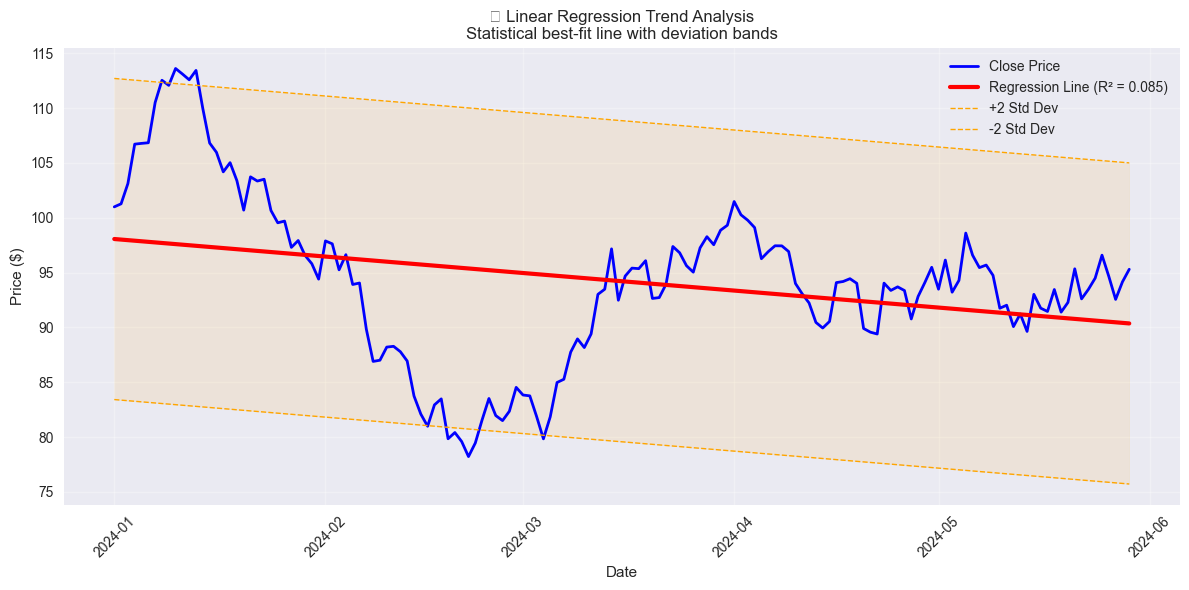

💡 REGRESSION TREND ANALYSIS:
• Slope: -0.052 (price change per day)
• R-squared: 0.085 (how well the line fits)
• Prices above regression line: potentially overbought
• Prices below regression line: potentially oversold
• Strong deviations from trend may signal reversal points


In [36]:
# 4. REGRESSION TREND
def plot_regression_trend():
    """Demonstrate linear regression trend analysis"""
    fig = go.Figure()
    
    # Plot the price data
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=data['Close'],
        mode='lines',
        name='Close Price',
        line=dict(color='blue', width=2)
    ))
    
    # Calculate linear regression
    x_numeric = np.arange(len(data))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, data['Close'])
    
    # Create regression line
    regression_line = slope * x_numeric + intercept
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=regression_line,
        mode='lines',
        name=f'Regression Line (R² = {r_value**2:.3f})',
        line=dict(color='red', width=3)
    ))
    
    # Add standard deviation bands
    std_dev = np.std(data['Close'] - regression_line)
    upper_band = regression_line + 2 * std_dev
    lower_band = regression_line - 2 * std_dev
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=upper_band,
        mode='lines',
        name='+2 Std Dev',
        line=dict(color='orange', width=1, dash='dash')
    ))
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=lower_band,
        mode='lines',
        name='-2 Std Dev',
        line=dict(color='orange', width=1, dash='dash'),
        fill='tonexty',
        fillcolor='rgba(255,165,0,0.1)'
    ))
    
    fig.update_layout(
        title='📈 Linear Regression Trend Analysis<br><sub>Statistical best-fit line with deviation bands</sub>',
        xaxis_title='Date',
        yaxis_title='Price ($)',
        template='plotly_white',
        height=500
    )
    
    return fig

def plot_regression_trend_matplotlib():
    """Matplotlib fallback for regression trend"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the price data
    ax.plot(data['Date'], data['Close'], label='Close Price', color='blue', linewidth=2)
    
    # Calculate linear regression
    x_numeric = np.arange(len(data))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, data['Close'])
    
    # Create regression line
    regression_line = slope * x_numeric + intercept
    ax.plot(data['Date'], regression_line, 
            label=f'Regression Line (R² = {r_value**2:.3f})', 
            color='red', linewidth=3)
    
    # Add standard deviation bands
    std_dev = np.std(data['Close'] - regression_line)
    upper_band = regression_line + 2 * std_dev
    lower_band = regression_line - 2 * std_dev
    
    ax.plot(data['Date'], upper_band, color='orange', linewidth=1, linestyle='--', label='+2 Std Dev')
    ax.plot(data['Date'], lower_band, color='orange', linewidth=1, linestyle='--', label='-2 Std Dev')
    ax.fill_between(data['Date'], lower_band, upper_band, alpha=0.1, color='orange')
    
    ax.set_title('📈 Linear Regression Trend Analysis\nStatistical best-fit line with deviation bands')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return slope, r_value

# Calculate regression for info display
x_numeric = np.arange(len(data))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, data['Close'])

try:
    if PLOTLY_AVAILABLE:
        try:
            regression_fig = plot_regression_trend()
            regression_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using matplotlib fallback...")
            slope, r_value = plot_regression_trend_matplotlib()
    else:
        print("📊 Using matplotlib fallback...")
        slope, r_value = plot_regression_trend_matplotlib()
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using matplotlib fallback...")
    slope, r_value = plot_regression_trend_matplotlib()

print("💡 REGRESSION TREND ANALYSIS:")
print(f"• Slope: {slope:.3f} (price change per day)")
print(f"• R-squared: {r_value**2:.3f} (how well the line fits)")
print("• Prices above regression line: potentially overbought")
print("• Prices below regression line: potentially oversold")
print("• Strong deviations from trend may signal reversal points")

# 🔱 PITCHFORKS - Advanced Three-Point Analysis

Pitchforks are sophisticated tools that use three points to create dynamic support and resistance levels.

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using matplotlib fallback...


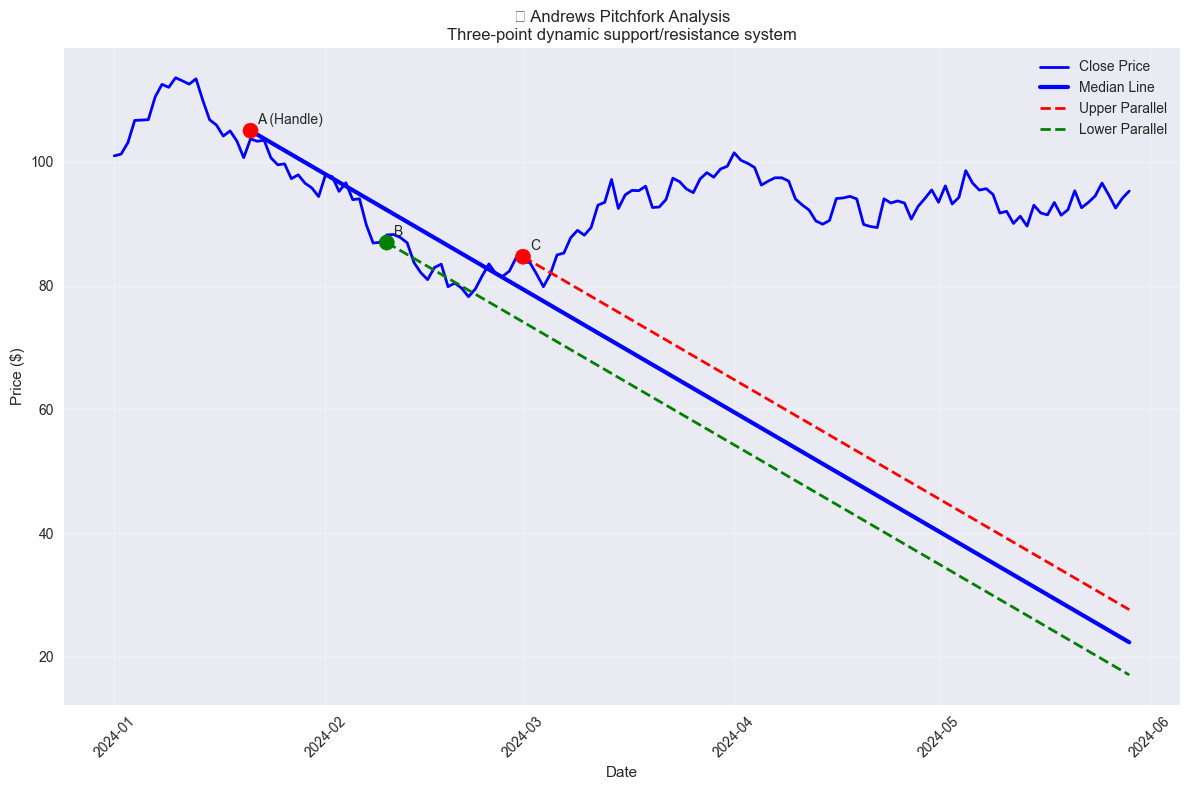

💡 ANDREWS PITCHFORK USAGE:
1. Point A (Handle): Choose a significant high or low
2. Point B: Select opposite extreme (low if A was high)
3. Point C: Choose another extreme in same direction as A
4. Median line connects A to midpoint of B-C
5. Parallel lines through B and C create dynamic channels

📊 TRADING STRATEGY:
• Price tends to gravitate toward the median line
• Upper/lower parallels act as dynamic resistance/support
• Works best in trending markets
• Look for touches and bounces off the lines


In [38]:
# 5. ANDREWS PITCHFORK
def plot_andrews_pitchfork():
    """Demonstrate Andrews Pitchfork analysis"""
    fig = go.Figure()
    
    # Plot candlestick chart
    fig.add_trace(go.Candlestick(
        x=data['Date'],
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'],
        name='Price'
    ))
    
    # Define three key points for the pitchfork
    # Point A (handle): Significant high or low
    point_a_idx = 20
    point_a = (data['Date'].iloc[point_a_idx], data['High'].iloc[point_a_idx])
    
    # Point B: Opposite extreme (low if A was high)
    point_b_idx = 40
    point_b = (data['Date'].iloc[point_b_idx], data['Low'].iloc[point_b_idx])
    
    # Point C: Another extreme in same direction as A
    point_c_idx = 60
    point_c = (data['Date'].iloc[point_c_idx], data['High'].iloc[point_c_idx])
    
    # Calculate median line (from A to midpoint of B-C)
    midpoint_bc_x = point_b_idx + (point_c_idx - point_b_idx) / 2
    midpoint_bc_y = point_b[1] + (point_c[1] - point_b[1]) / 2
    
    # Extend median line
    end_idx = len(data) - 1
    slope_median = (midpoint_bc_y - point_a[1]) / (midpoint_bc_x - point_a_idx)
    end_median_y = point_a[1] + slope_median * (end_idx - point_a_idx)
    
    # Plot median line
    fig.add_trace(go.Scatter(
        x=[point_a[0], data['Date'].iloc[end_idx]],
        y=[point_a[1], end_median_y],
        mode='lines',
        name='Median Line',
        line=dict(color='blue', width=3)
    ))
    
    # Calculate and plot parallel lines through B and C
    # Upper parallel line (through C)
    upper_parallel_start_y = point_c[1]
    upper_parallel_end_y = point_c[1] + slope_median * (end_idx - point_c_idx)
    
    fig.add_trace(go.Scatter(
        x=[point_c[0], data['Date'].iloc[end_idx]],
        y=[upper_parallel_start_y, upper_parallel_end_y],
        mode='lines',
        name='Upper Parallel',
        line=dict(color='red', width=2, dash='dash')
    ))
    
    # Lower parallel line (through B)
    lower_parallel_start_y = point_b[1]
    lower_parallel_end_y = point_b[1] + slope_median * (end_idx - point_b_idx)
    
    fig.add_trace(go.Scatter(
        x=[point_b[0], data['Date'].iloc[end_idx]],
        y=[lower_parallel_start_y, lower_parallel_end_y],
        mode='lines',
        name='Lower Parallel',
        line=dict(color='green', width=2, dash='dash')
    ))
    
    # Mark the three key points
    fig.add_trace(go.Scatter(
        x=[point_a[0], point_b[0], point_c[0]],
        y=[point_a[1], point_b[1], point_c[1]],
        mode='markers+text',
        name='Key Points',
        marker=dict(size=12, color=['red', 'green', 'red']),
        text=['A (Handle)', 'B', 'C'],
        textposition='top center'
    ))
    
    fig.update_layout(
        title='🔱 Andrews Pitchfork Analysis<br><sub>Three-point dynamic support/resistance system</sub>',
        xaxis_title='Date',
        yaxis_title='Price ($)',
        template='plotly_white',
        height=600
    )
    
    return fig

def plot_andrews_pitchfork_matplotlib():
    """Matplotlib fallback for Andrews Pitchfork"""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the price data
    ax.plot(data['Date'], data['Close'], label='Close Price', color='blue', linewidth=2)
    
    # Define three key points for the pitchfork
    point_a_idx = 20
    point_a = (data['Date'].iloc[point_a_idx], data['High'].iloc[point_a_idx])
    
    point_b_idx = 40
    point_b = (data['Date'].iloc[point_b_idx], data['Low'].iloc[point_b_idx])
    
    point_c_idx = 60
    point_c = (data['Date'].iloc[point_c_idx], data['High'].iloc[point_c_idx])
    
    # Calculate median line
    midpoint_bc_x = point_b_idx + (point_c_idx - point_b_idx) / 2
    midpoint_bc_y = point_b[1] + (point_c[1] - point_b[1]) / 2
    
    end_idx = len(data) - 1
    slope_median = (midpoint_bc_y - point_a[1]) / (midpoint_bc_x - point_a_idx)
    end_median_y = point_a[1] + slope_median * (end_idx - point_a_idx)
    
    # Plot median line
    ax.plot([point_a[0], data['Date'].iloc[end_idx]], 
            [point_a[1], end_median_y], 
            color='blue', linewidth=3, label='Median Line')
    
    # Upper parallel line (through C)
    upper_parallel_end_y = point_c[1] + slope_median * (end_idx - point_c_idx)
    ax.plot([point_c[0], data['Date'].iloc[end_idx]], 
            [point_c[1], upper_parallel_end_y], 
            color='red', linewidth=2, linestyle='--', label='Upper Parallel')
    
    # Lower parallel line (through B)
    lower_parallel_end_y = point_b[1] + slope_median * (end_idx - point_b_idx)
    ax.plot([point_b[0], data['Date'].iloc[end_idx]], 
            [point_b[1], lower_parallel_end_y], 
            color='green', linewidth=2, linestyle='--', label='Lower Parallel')
    
    # Mark the three key points
    ax.scatter([point_a[0], point_b[0], point_c[0]], 
              [point_a[1], point_b[1], point_c[1]], 
              s=120, c=['red', 'green', 'red'], zorder=5)
    ax.annotate('A (Handle)', (point_a[0], point_a[1]), xytext=(5, 5), 
                textcoords='offset points')
    ax.annotate('B', (point_b[0], point_b[1]), xytext=(5, 5), 
                textcoords='offset points')
    ax.annotate('C', (point_c[0], point_c[1]), xytext=(5, 5), 
                textcoords='offset points')
    
    ax.set_title('🔱 Andrews Pitchfork Analysis\nThree-point dynamic support/resistance system')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

try:
    if PLOTLY_AVAILABLE:
        try:
            pitchfork_fig = plot_andrews_pitchfork()
            pitchfork_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using matplotlib fallback...")
            plot_andrews_pitchfork_matplotlib()
    else:
        print("📊 Using matplotlib fallback...")
        plot_andrews_pitchfork_matplotlib()
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using matplotlib fallback...")
    plot_andrews_pitchfork_matplotlib()

print("💡 ANDREWS PITCHFORK USAGE:")
print("1. Point A (Handle): Choose a significant high or low")
print("2. Point B: Select opposite extreme (low if A was high)")
print("3. Point C: Choose another extreme in same direction as A")
print("4. Median line connects A to midpoint of B-C")
print("5. Parallel lines through B and C create dynamic channels")
print("\n📊 TRADING STRATEGY:")
print("• Price tends to gravitate toward the median line")
print("• Upper/lower parallels act as dynamic resistance/support")
print("• Works best in trending markets")
print("• Look for touches and bounces off the lines")

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using matplotlib fallback...


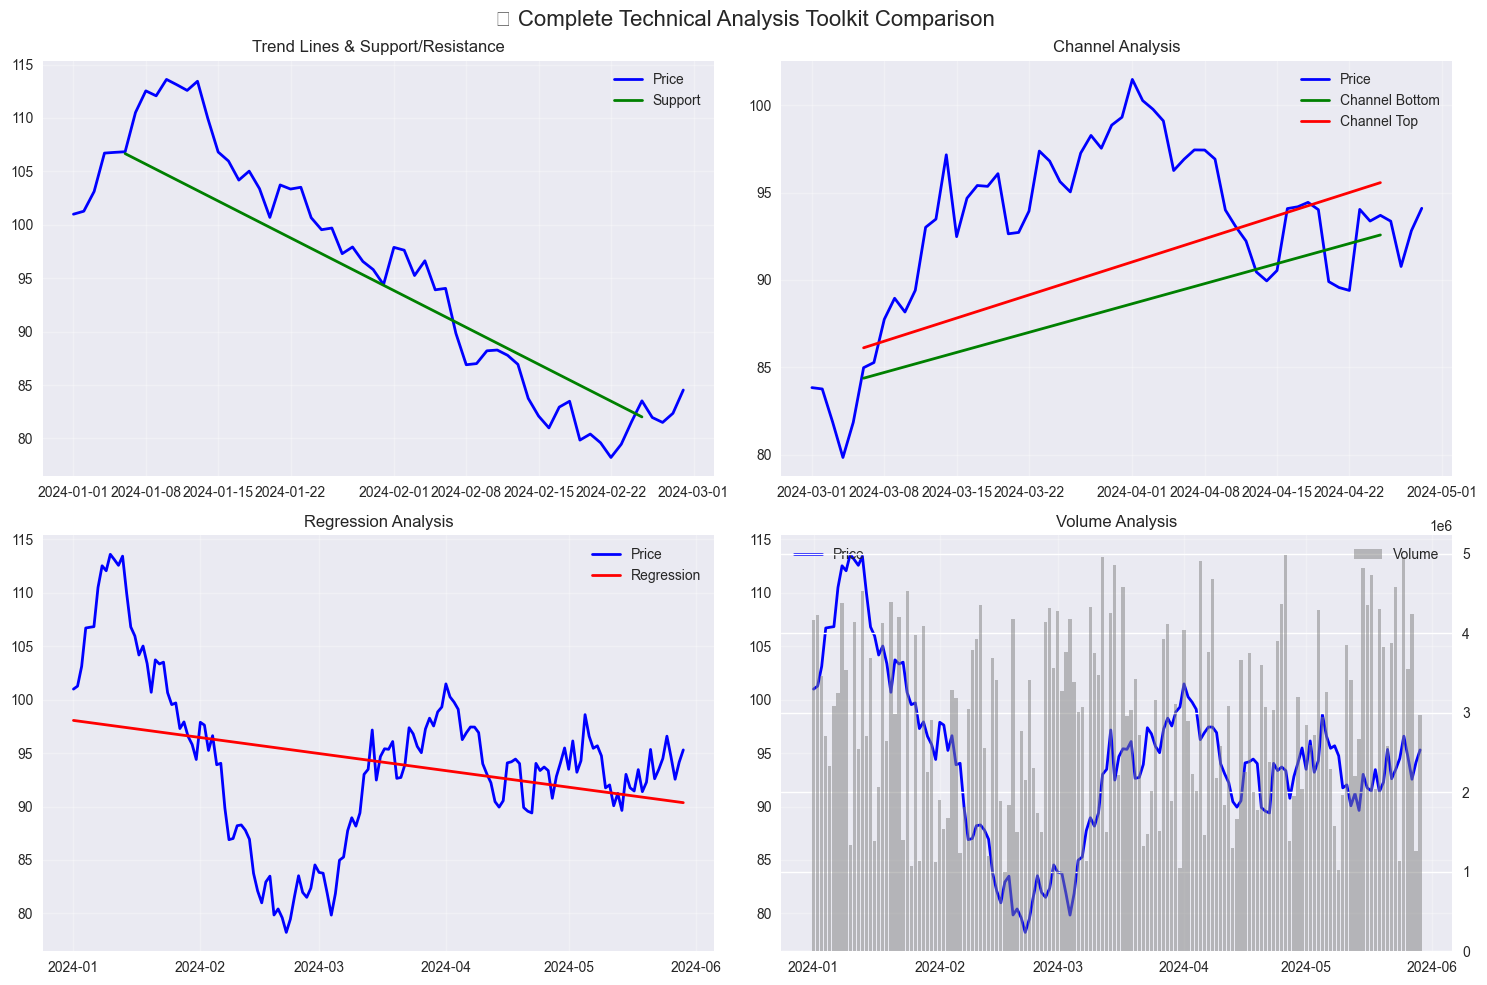

In [40]:
# 6. COMPREHENSIVE TOOL COMPARISON
def create_tool_comparison():
    """Create a comprehensive comparison of all tools"""
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Trend Lines & Support/Resistance', 'Channel Analysis', 
                       'Regression Analysis', 'Volume Analysis'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": True}]]
    )
    
    # Plot 1: Basic trend lines
    fig.add_trace(go.Scatter(
        x=data['Date'][:60],
        y=data['Close'][:60],
        mode='lines',
        name='Price',
        line=dict(color='blue')
    ), row=1, col=1)
    
    # Add trend line
    fig.add_trace(go.Scatter(
        x=[data['Date'].iloc[5], data['Date'].iloc[55]],
        y=[data['Low'].iloc[5], data['Low'].iloc[55]],
        mode='lines',
        name='Support',
        line=dict(color='green', dash='solid')
    ), row=1, col=1)
    
    # Plot 2: Channel
    fig.add_trace(go.Scatter(
        x=data['Date'][60:120],
        y=data['Close'][60:120],
        mode='lines',
        name='Price',
        line=dict(color='blue'),
        showlegend=False
    ), row=1, col=2)
    
    # Add channel lines
    channel_start_idx, channel_end_idx = 65, 115
    lower_channel = [data['Low'].iloc[channel_start_idx], data['Low'].iloc[channel_end_idx]]
    upper_channel = [data['High'].iloc[channel_start_idx], data['High'].iloc[channel_end_idx]]
    
    fig.add_trace(go.Scatter(
        x=[data['Date'].iloc[channel_start_idx], data['Date'].iloc[channel_end_idx]],
        y=lower_channel,
        mode='lines',
        name='Channel Bottom',
        line=dict(color='green')
    ), row=1, col=2)
    
    fig.add_trace(go.Scatter(
        x=[data['Date'].iloc[channel_start_idx], data['Date'].iloc[channel_end_idx]],
        y=upper_channel,
        mode='lines',
        name='Channel Top',
        line=dict(color='red')
    ), row=1, col=2)
    
    # Plot 3: Regression
    x_reg = np.arange(len(data))
    slope_reg, intercept_reg = np.polyfit(x_reg, data['Close'], 1)
    regression_line = slope_reg * x_reg + intercept_reg
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=data['Close'],
        mode='lines',
        name='Price',
        line=dict(color='blue'),
        showlegend=False
    ), row=2, col=1)
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=regression_line,
        mode='lines',
        name='Regression',
        line=dict(color='red')
    ), row=2, col=1)
    
    # Plot 4: Volume analysis
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=data['Close'],
        mode='lines',
        name='Price',
        line=dict(color='blue'),
        showlegend=False
    ), row=2, col=2)
    
    fig.add_trace(go.Bar(
        x=data['Date'],
        y=data['Volume'],
        name='Volume',
        marker_color='rgba(128,128,128,0.5)'
    ), row=2, col=2, secondary_y=True)
    
    # Update layout
    fig.update_layout(
        title='📊 Complete Technical Analysis Toolkit Comparison',
        height=800,
        template='plotly_white'
    )
    
    # Update y-axis labels
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=2)
    fig.update_yaxes(title_text="Price ($)", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=2, col=2)
    fig.update_yaxes(title_text="Volume", row=2, col=2, secondary_y=True)
    
    return fig

def create_tool_comparison_matplotlib():
    """Matplotlib fallback for tool comparison"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Basic trend lines
    axes[0,0].plot(data['Date'][:60], data['Close'][:60], 'b-', label='Price', linewidth=2)
    axes[0,0].plot([data['Date'].iloc[5], data['Date'].iloc[55]], 
                  [data['Low'].iloc[5], data['Low'].iloc[55]], 
                  'g-', label='Support', linewidth=2)
    axes[0,0].set_title('Trend Lines & Support/Resistance')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: Channel
    axes[0,1].plot(data['Date'][60:120], data['Close'][60:120], 'b-', label='Price', linewidth=2)
    channel_start_idx, channel_end_idx = 65, 115
    lower_channel = [data['Low'].iloc[channel_start_idx], data['Low'].iloc[channel_end_idx]]
    upper_channel = [data['High'].iloc[channel_start_idx], data['High'].iloc[channel_end_idx]]
    axes[0,1].plot([data['Date'].iloc[channel_start_idx], data['Date'].iloc[channel_end_idx]], 
                  lower_channel, 'g-', label='Channel Bottom', linewidth=2)
    axes[0,1].plot([data['Date'].iloc[channel_start_idx], data['Date'].iloc[channel_end_idx]], 
                  upper_channel, 'r-', label='Channel Top', linewidth=2)
    axes[0,1].set_title('Channel Analysis')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: Regression
    x_reg = np.arange(len(data))
    slope_reg, intercept_reg = np.polyfit(x_reg, data['Close'], 1)
    regression_line = slope_reg * x_reg + intercept_reg
    axes[1,0].plot(data['Date'], data['Close'], 'b-', label='Price', linewidth=2)
    axes[1,0].plot(data['Date'], regression_line, 'r-', label='Regression', linewidth=2)
    axes[1,0].set_title('Regression Analysis')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Volume analysis
    ax_vol = axes[1,1].twinx()
    axes[1,1].plot(data['Date'], data['Close'], 'b-', label='Price', linewidth=2)
    ax_vol.bar(data['Date'], data['Volume'], alpha=0.5, color='gray', label='Volume')
    axes[1,1].set_title('Volume Analysis')
    axes[1,1].legend(loc='upper left')
    ax_vol.legend(loc='upper right')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.suptitle('📊 Complete Technical Analysis Toolkit Comparison', fontsize=16)
    plt.tight_layout()
    plt.show()

try:
    if PLOTLY_AVAILABLE:
        try:
            comparison_fig = create_tool_comparison()
            comparison_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using matplotlib fallback...")
            create_tool_comparison_matplotlib()
    else:
        print("📊 Using matplotlib fallback...")
        create_tool_comparison_matplotlib()
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using matplotlib fallback...")
    create_tool_comparison_matplotlib()

# 📋 TRADING STRATEGIES & BEST PRACTICES

## 🎯 When to Use Each Tool

### **LINES**
- **Trend Lines**: Identify trend direction and potential reversal points
- **Horizontal Lines**: Mark key support/resistance levels
- **Vertical Lines**: Correlate price action with time events

### **CHANNELS**  
- **Parallel Channels**: Range-bound trading strategies
- **Regression Trends**: Statistical analysis of price direction
- **Flat Top/Bottom**: Breakout pattern identification

### **PITCHFORKS**
- **Andrews Pitchfork**: Advanced trending market analysis
- Best for strong trending markets with clear swing points

## ⚠️ Common Mistakes to Avoid

1. **Over-analysis**: Too many lines can create confusion
2. **Forcing patterns**: Don't draw lines to fit your bias
3. **Ignoring volume**: Always confirm with volume analysis
4. **Static thinking**: Adjust lines as new data emerges
5. **Single timeframe**: Use multiple timeframes for confirmation

## 📈 Professional Trading Tips

### **Entry Signals**
- Wait for price to approach and respect drawn levels
- Look for rejection candles at support/resistance
- Combine with momentum indicators for confirmation

### **Risk Management**
- Place stops beyond key levels (not exactly on them)
- Use position sizing based on distance to stop
- Never risk more than 1-2% per trade

### **Multiple Timeframe Analysis**
- Weekly charts: Major trend direction
- Daily charts: Entry timing
- Hourly charts: Precise entry points

In [42]:
# 7. TOOL SUMMARY & QUICK REFERENCE
def create_tool_summary():
    """Create an interactive summary of all tools"""
    
    tools_data = {
        'Tool': ['Trend Line', 'Ray', 'Info Line', 'Extended Line', 'Trend Angle',
                'Horizontal Line', 'Horizontal Ray', 'Vertical Line', 'Cross Line',
                'Parallel Channel', 'Regression Trend', 'Flat Top/Bottom', 
                'Disjoint Channel', 'Pitchfork'],
        'Shortcut': ['Alt + T', 'N/A', 'N/A', 'N/A', 'N/A', 
                    'Alt + H', 'Alt + J', 'Alt + V', 'Alt + C',
                    'N/A', 'N/A', 'N/A', 'N/A', 'N/A'],
        'Category': ['Lines', 'Lines', 'Lines', 'Lines', 'Lines',
                    'Lines', 'Lines', 'Lines', 'Lines',
                    'Channels', 'Channels', 'Channels', 'Channels', 'Pitchforks'],
        'Primary Use': ['Trend identification', 'Future projections', 'Measurements', 
                       'Key levels', 'Trend strength', 'Support/Resistance', 
                       'Future levels', 'Time events', 'Specific coordinates',
                       'Range trading', 'Statistical analysis', 'Breakout patterns',
                       'Complex levels', 'Dynamic channels'],
        'Difficulty': ['Beginner', 'Beginner', 'Beginner', 'Beginner', 'Intermediate',
                      'Beginner', 'Beginner', 'Beginner', 'Beginner',
                      'Intermediate', 'Intermediate', 'Advanced', 'Advanced', 'Advanced'],
        'Best Market': ['Trending', 'Any', 'Any', 'Any', 'Trending',
                       'Any', 'Any', 'Any', 'Any',
                       'Range-bound', 'Any', 'Range-bound', 'Complex', 'Trending']
    }
    
    df = pd.DataFrame(tools_data)
    
    # Create an interactive table using plotly
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df.columns),
                   fill_color='lightblue',
                   align='center',
                   font=dict(size=12, color='black')),
        cells=dict(values=[df[col] for col in df.columns],
                  fill_color=[['lightgray', 'white'] * len(df)],
                  align='center',
                  font=dict(size=11)))
    ])
    
    fig.update_layout(
        title='📊 Complete Trading Tools Reference Guide',
        height=500
    )
    
    return fig, df

def create_tool_summary_text(tools_df):
    """Text-based fallback for tool summary"""
    print("📊 Complete Trading Tools Reference Guide")
    print("=" * 60)
    
    # Display the table in text format
    for _, row in tools_df.iterrows():
        print(f"\n📌 {row['Tool']}")
        print(f"   Category: {row['Category']}")
        print(f"   Shortcut: {row['Shortcut']}")
        print(f"   Primary Use: {row['Primary Use']}")
        print(f"   Difficulty: {row['Difficulty']}")
        print(f"   Best Market: {row['Best Market']}")

try:
    if PLOTLY_AVAILABLE:
        try:
            summary_fig, tools_df = create_tool_summary()
            summary_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using text fallback...")
            _, tools_df = create_tool_summary()
            create_tool_summary_text(tools_df)
    else:
        print("📊 Using text fallback...")
        _, tools_df = create_tool_summary()
        create_tool_summary_text(tools_df)
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using text fallback...")
    _, tools_df = create_tool_summary()
    create_tool_summary_text(tools_df)

print("📋 QUICK REFERENCE GUIDE")
print("=" * 50)
print("\n🔰 BEGINNER TOOLS (Start Here):")
beginner_tools = tools_df[tools_df['Difficulty'] == 'Beginner']['Tool'].tolist()
print("• " + "\n• ".join(beginner_tools))

print("\n🔶 INTERMEDIATE TOOLS:")
intermediate_tools = tools_df[tools_df['Difficulty'] == 'Intermediate']['Tool'].tolist()
print("• " + "\n• ".join(intermediate_tools))

print("\n🔴 ADVANCED TOOLS:")
advanced_tools = tools_df[tools_df['Difficulty'] == 'Advanced']['Tool'].tolist()
print("• " + "\n• ".join(advanced_tools))

print("\n💡 LEARNING PATH RECOMMENDATION:")
print("1. Master horizontal/vertical lines and basic trend lines")
print("2. Learn parallel channels and regression analysis") 
print("3. Progress to pitchforks and complex patterns")
print("4. Always practice on historical data before live trading!")

# Save the tool summary as CSV for reference
tools_df.to_csv('trading_tools_reference.csv', index=False)
print(f"\n💾 Reference guide saved as 'trading_tools_reference.csv'")

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using text fallback...
📊 Complete Trading Tools Reference Guide

📌 Trend Line
   Category: Lines
   Shortcut: Alt + T
   Primary Use: Trend identification
   Difficulty: Beginner
   Best Market: Trending

📌 Ray
   Category: Lines
   Shortcut: N/A
   Primary Use: Future projections
   Difficulty: Beginner
   Best Market: Any

📌 Info Line
   Category: Lines
   Shortcut: N/A
   Primary Use: Measurements
   Difficulty: Beginner
   Best Market: Any

📌 Extended Line
   Category: Lines
   Shortcut: N/A
   Primary Use: Key levels
   Difficulty: Beginner
   Best Market: Any

📌 Trend Angle
   Category: Lines
   Shortcut: N/A
   Primary Use: Trend strength
   Difficulty: Intermediate
   Best Market: Trending

📌 Horizontal Line
   Category: Lines
   Shortcut: Alt + H
   Primary Use: Support/Resistance
   Difficulty: Beginner
   Best Market: Any

📌 Horizontal Ray
   Category: Lines
   Shortcut: Alt

# 📊 VOLUME CONFIRMATION - The Missing Piece

Volume confirmation is crucial for validating technical analysis signals. Price movements without volume are often weak and unreliable.

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using matplotlib fallback...


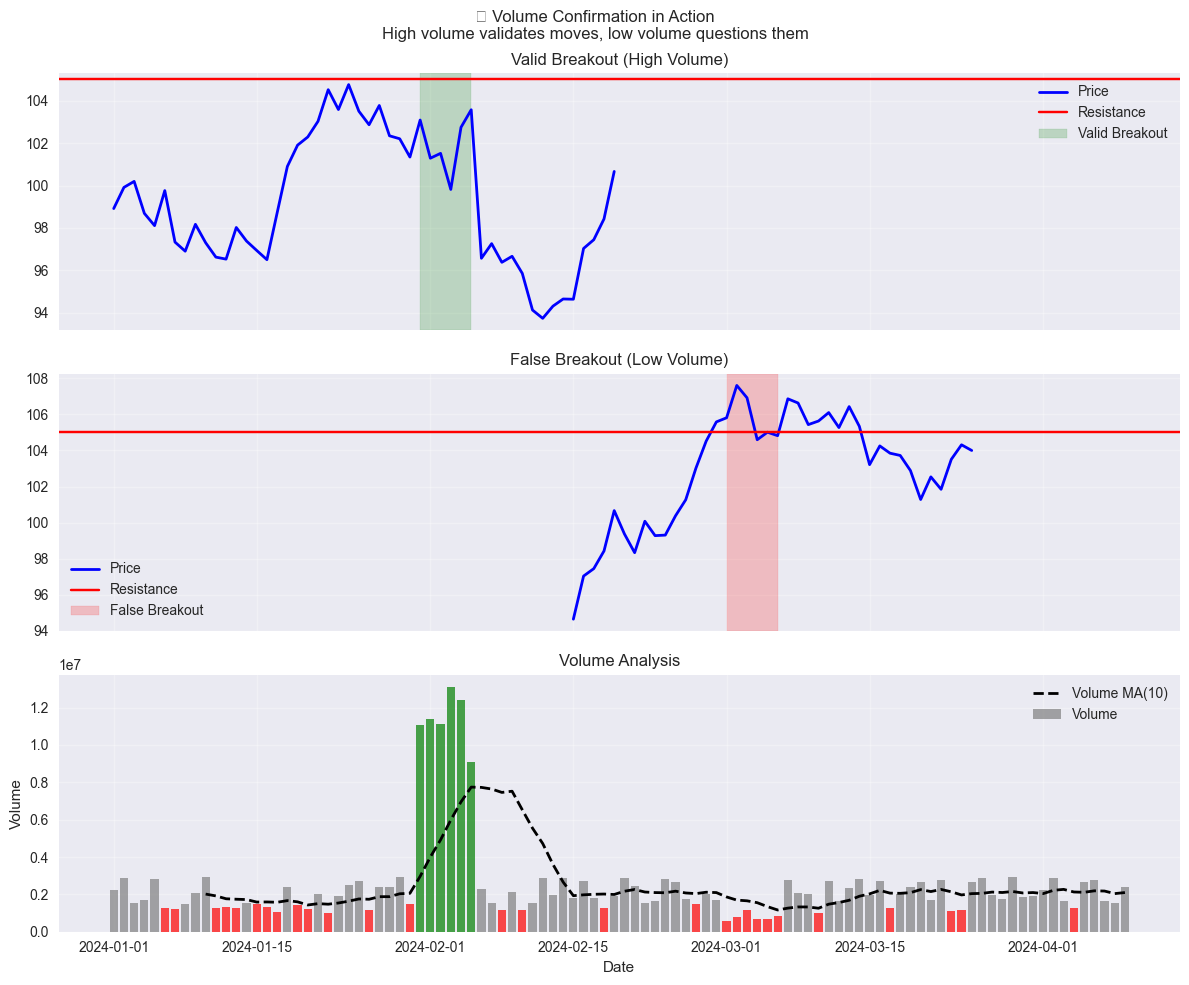

💡 VOLUME CONFIRMATION RULES:
✅ STRONG SIGNALS (High Volume):
• Breakouts above resistance with 2x+ average volume
• Breakdowns below support with heavy selling
• Trend line breaks with volume surge
• Channel breakouts with institutional participation

❌ WEAK SIGNALS (Low Volume):
• Breakouts with below-average volume (often fail)
• Price moves without institutional interest
• Weekend/holiday moves with thin trading
• Late-day moves on low volume


In [44]:
# VOLUME CONFIRMATION PRINCIPLES
def plot_volume_confirmation():
    """Demonstrate volume confirmation in breakouts and reversals"""
    
    # Create subplots for price and volume
    fig = make_subplots(
        rows=3, cols=1,
        shared_xaxes=True,
        subplot_titles=('Valid Breakout (High Volume)', 'False Breakout (Low Volume)', 'Volume Analysis'),
        row_heights=[0.4, 0.4, 0.2],
        vertical_spacing=0.05
    )
    
    # Generate data with specific volume patterns
    np.random.seed(123)
    dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
    
    # Create price data with breakout scenarios
    base_price = 100
    prices = np.random.normal(0, 1, 100).cumsum() + base_price
    
    # Simulate valid breakout with high volume (days 30-35)
    prices[30:36] += np.array([2, 3, 5, 4, 6, 7])  # Strong upward move
    volumes = np.random.randint(1000000, 3000000, 100)
    volumes[30:36] = np.random.randint(8000000, 15000000, 6)  # High volume during breakout
    
    # Simulate false breakout with low volume (days 60-65)
    prices[60:66] += np.array([1, 2, 1, 0, -1, -2])  # Weak move that fails
    volumes[60:66] = np.random.randint(500000, 1200000, 6)  # Low volume during move
    
    # Plot 1: Valid breakout scenario
    resistance_level = 105
    
    fig.add_trace(go.Scatter(
        x=dates[:50],
        y=prices[:50],
        mode='lines',
        name='Price',
        line=dict(color='blue', width=2)
    ), row=1, col=1)
    
    fig.add_hline(
        y=resistance_level,
        line_dash="solid",
        line_color="red",
        annotation_text="Resistance",
        row=1, col=1
    )
    
    # Highlight breakout area
    fig.add_vrect(
        x0=dates[30], x1=dates[35],
        fillcolor="green", opacity=0.2,
        annotation_text="Valid Breakout", annotation_position="top left",
        row=1, col=1
    )
    
    # Plot 2: False breakout scenario  
    fig.add_trace(go.Scatter(
        x=dates[45:85],
        y=prices[45:85],
        mode='lines',
        name='Price',
        line=dict(color='blue', width=2),
        showlegend=False
    ), row=2, col=1)
    
    fig.add_hline(
        y=resistance_level,
        line_dash="solid", 
        line_color="red",
        row=2, col=1
    )
    
    # Highlight false breakout area
    fig.add_vrect(
        x0=dates[60], x1=dates[65],
        fillcolor="red", opacity=0.2,
        annotation_text="False Breakout", annotation_position="top left",
        row=2, col=1
    )
    
    # Plot 3: Volume comparison
    colors = ['green' if v > 5000000 else 'red' if v < 1500000 else 'gray' for v in volumes]
    
    fig.add_trace(go.Bar(
        x=dates,
        y=volumes,
        name='Volume',
        marker_color=colors,
        showlegend=False
    ), row=3, col=1)
    
    # Add volume moving average
    volume_ma = pd.Series(volumes).rolling(window=10).mean()
    fig.add_trace(go.Scatter(
        x=dates,
        y=volume_ma,
        mode='lines',
        name='Volume MA(10)',
        line=dict(color='black', width=2, dash='dash')
    ), row=3, col=1)
    
    fig.update_layout(
        title='📊 Volume Confirmation in Action<br><sub>High volume validates moves, low volume questions them</sub>',
        height=800,
        template='plotly_white'
    )
    
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Price ($)", row=2, col=1)
    fig.update_yaxes(title_text="Volume", row=3, col=1)
    fig.update_xaxes(title_text="Date", row=3, col=1)
    
    return fig

def plot_volume_confirmation_matplotlib():
    """Matplotlib fallback for volume confirmation"""
    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
    
    # Generate data with specific volume patterns
    np.random.seed(123)
    dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
    
    base_price = 100
    prices = np.random.normal(0, 1, 100).cumsum() + base_price
    
    # Simulate valid breakout with high volume (days 30-35)
    prices[30:36] += np.array([2, 3, 5, 4, 6, 7])
    volumes = np.random.randint(1000000, 3000000, 100)
    volumes[30:36] = np.random.randint(8000000, 15000000, 6)
    
    # Simulate false breakout with low volume (days 60-65)
    prices[60:66] += np.array([1, 2, 1, 0, -1, -2])
    volumes[60:66] = np.random.randint(500000, 1200000, 6)
    
    resistance_level = 105
    
    # Plot 1: Valid breakout scenario
    axes[0].plot(dates[:50], prices[:50], 'b-', linewidth=2, label='Price')
    axes[0].axhline(y=resistance_level, color='red', linestyle='-', label='Resistance')
    axes[0].axvspan(dates[30], dates[35], alpha=0.2, color='green', label='Valid Breakout')
    axes[0].set_title('Valid Breakout (High Volume)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: False breakout scenario
    axes[1].plot(dates[45:85], prices[45:85], 'b-', linewidth=2, label='Price')
    axes[1].axhline(y=resistance_level, color='red', linestyle='-', label='Resistance')
    axes[1].axvspan(dates[60], dates[65], alpha=0.2, color='red', label='False Breakout')
    axes[1].set_title('False Breakout (Low Volume)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Volume comparison
    colors = ['green' if v > 5000000 else 'red' if v < 1500000 else 'gray' for v in volumes]
    axes[2].bar(dates, volumes, color=colors, alpha=0.7, label='Volume')
    
    volume_ma = pd.Series(volumes).rolling(window=10).mean()
    axes[2].plot(dates, volume_ma, 'k--', linewidth=2, label='Volume MA(10)')
    axes[2].set_title('Volume Analysis')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Volume')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.suptitle('📊 Volume Confirmation in Action\nHigh volume validates moves, low volume questions them')
    plt.tight_layout()
    plt.show()

try:
    if PLOTLY_AVAILABLE:
        try:
            volume_fig = plot_volume_confirmation()
            volume_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using matplotlib fallback...")
            plot_volume_confirmation_matplotlib()
    else:
        print("📊 Using matplotlib fallback...")
        plot_volume_confirmation_matplotlib()
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using matplotlib fallback...")
    plot_volume_confirmation_matplotlib()

print("💡 VOLUME CONFIRMATION RULES:")
print("✅ STRONG SIGNALS (High Volume):")
print("• Breakouts above resistance with 2x+ average volume")
print("• Breakdowns below support with heavy selling")
print("• Trend line breaks with volume surge")
print("• Channel breakouts with institutional participation")
print("\n❌ WEAK SIGNALS (Low Volume):")
print("• Breakouts with below-average volume (often fail)")
print("• Price moves without institutional interest")
print("• Weekend/holiday moves with thin trading")
print("• Late-day moves on low volume")

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using matplotlib fallback...


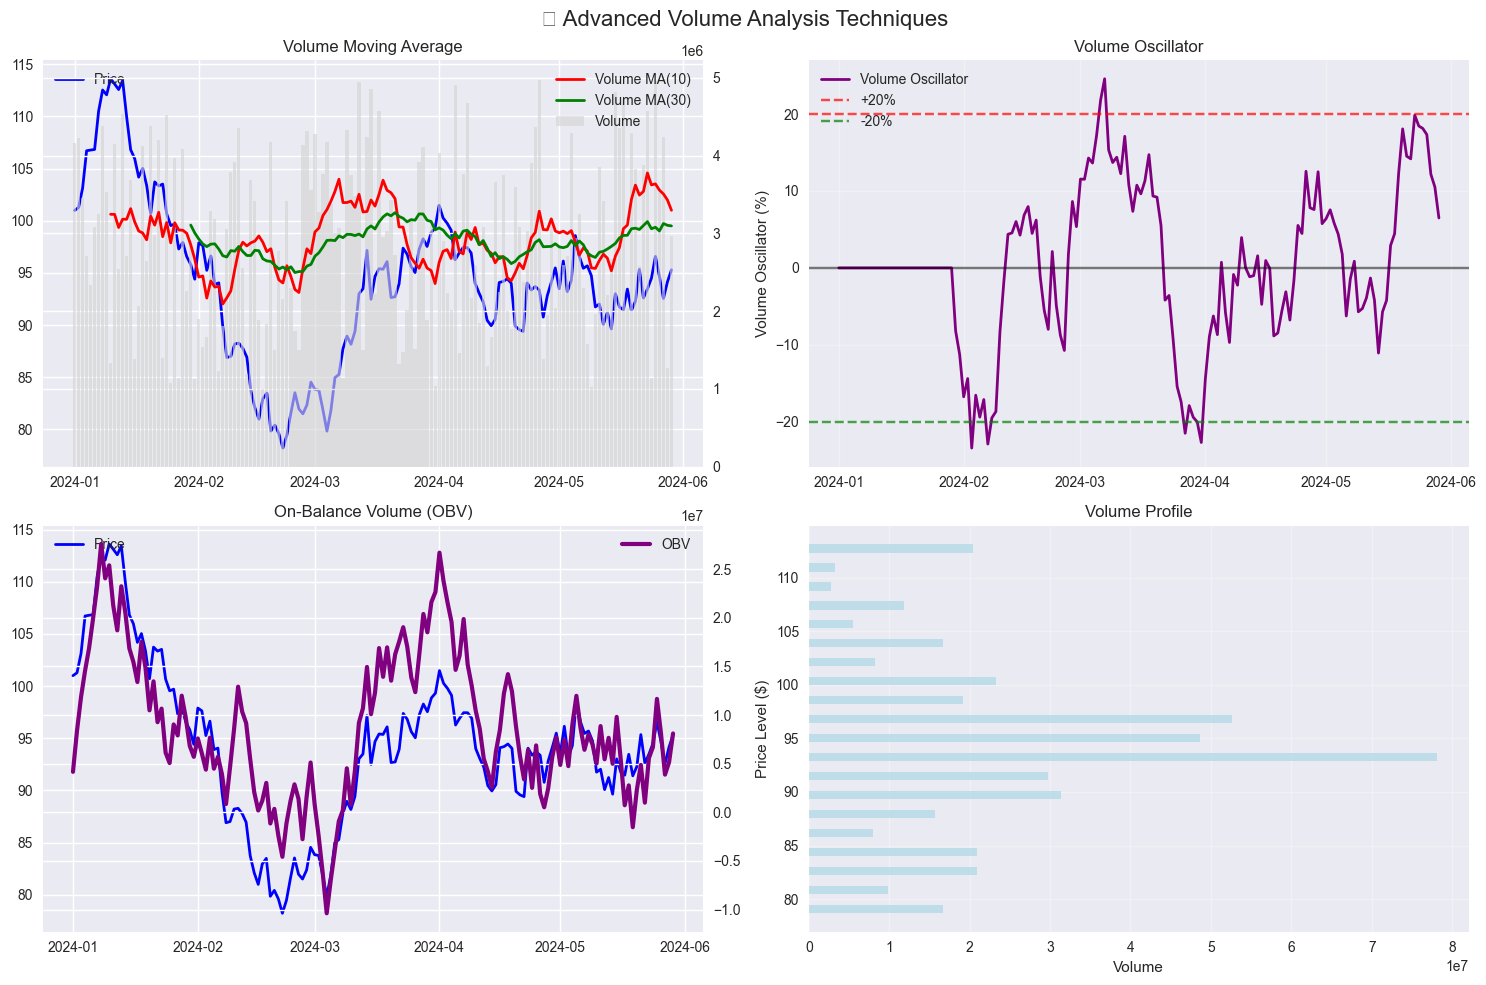

📊 VOLUME ANALYSIS TECHNIQUES:

1️⃣ VOLUME MOVING AVERAGE:
• Compare current volume to 10-day and 30-day averages
• Volume > 2x average = High conviction move
• Volume < 0.5x average = Low conviction move

2️⃣ VOLUME OSCILLATOR:
• (Short MA - Long MA) / Long MA × 100
• Above +20% = High volume environment
• Below -20% = Low volume environment
• Crossovers signal volume trend changes

3️⃣ ON-BALANCE VOLUME (OBV):
• Adds volume on up days, subtracts on down days
• OBV rising + price rising = Bullish confirmation
• OBV falling + price rising = Bearish divergence
• Leading indicator of price direction

4️⃣ VOLUME PROFILE:
• Shows volume traded at each price level
• High volume areas = Strong support/resistance
• Low volume areas = Potential breakout zones
• Point of Control (POC) = Highest volume price


In [46]:
# VOLUME ANALYSIS TECHNIQUES
def plot_volume_analysis_techniques():
    """Demonstrate various volume analysis methods"""
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Volume Moving Average', 'Volume Oscillator', 
                       'On-Balance Volume (OBV)', 'Volume Profile'),
        specs=[[{"secondary_y": True}, {"secondary_y": False}],
               [{"secondary_y": True}, {"secondary_y": False}]]
    )
    
    # Calculate volume indicators
    volume_ma_short = pd.Series(data['Volume']).rolling(window=10).mean()
    volume_ma_long = pd.Series(data['Volume']).rolling(window=30).mean()
    
    # Volume Oscillator: (Short MA - Long MA) / Long MA * 100
    volume_oscillator = ((volume_ma_short - volume_ma_long) / volume_ma_long * 100).fillna(0)
    
    # On-Balance Volume calculation
    obv = []
    obv_value = 0
    for i in range(len(data)):
        if i == 0:
            obv_value = data['Volume'].iloc[i]
        else:
            if data['Close'].iloc[i] > data['Close'].iloc[i-1]:
                obv_value += data['Volume'].iloc[i]
            elif data['Close'].iloc[i] < data['Close'].iloc[i-1]:
                obv_value -= data['Volume'].iloc[i]
            # If close is unchanged, OBV remains the same
        obv.append(obv_value)
    
    # Plot 1: Volume Moving Average
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=data['Close'],
        mode='lines',
        name='Price',
        line=dict(color='blue')
    ), row=1, col=1)
    
    fig.add_trace(go.Bar(
        x=data['Date'],
        y=data['Volume'],
        name='Volume',
        marker_color='lightgray',
        opacity=0.6
    ), row=1, col=1, secondary_y=True)
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=volume_ma_short,
        mode='lines',
        name='Vol MA(10)',
        line=dict(color='red', width=2)
    ), row=1, col=1, secondary_y=True)
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=volume_ma_long,
        mode='lines',
        name='Vol MA(30)',
        line=dict(color='orange', width=2)
    ), row=1, col=1, secondary_y=True)
    
    # Plot 2: Volume Oscillator
    colors = ['green' if x > 0 else 'red' for x in volume_oscillator]
    fig.add_trace(go.Bar(
        x=data['Date'],
        y=volume_oscillator,
        name='Volume Oscillator',
        marker_color=colors
    ), row=1, col=2)
    
    fig.add_hline(y=0, line_dash="solid", line_color="black", row=1, col=2)
    fig.add_hline(y=20, line_dash="dash", line_color="green", row=1, col=2)
    fig.add_hline(y=-20, line_dash="dash", line_color="red", row=1, col=2)
    
    # Plot 3: On-Balance Volume
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=data['Close'],
        mode='lines',
        name='Price',
        line=dict(color='blue'),
        showlegend=False
    ), row=2, col=1)
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=obv,
        mode='lines',
        name='OBV',
        line=dict(color='purple', width=3)
    ), row=2, col=1, secondary_y=True)
    
    # Plot 4: Volume Profile (simplified)
    price_ranges = pd.cut(data['Close'], bins=20)
    volume_by_price = data.groupby(price_ranges)['Volume'].sum().sort_index()
    price_midpoints = [interval.mid for interval in volume_by_price.index]
    
    fig.add_trace(go.Bar(
        x=volume_by_price.values,
        y=price_midpoints,
        orientation='h',
        name='Volume Profile',
        marker_color='lightblue'
    ), row=2, col=2)
    
    # Update layout
    fig.update_layout(
        title='📈 Advanced Volume Analysis Techniques',
        height=800,
        template='plotly_white'
    )
    
    # Update y-axis labels
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Volume", row=1, col=1, secondary_y=True)
    fig.update_yaxes(title_text="Volume Oscillator (%)", row=1, col=2)
    fig.update_yaxes(title_text="Price ($)", row=2, col=1)
    fig.update_yaxes(title_text="OBV", row=2, col=1, secondary_y=True)
    fig.update_yaxes(title_text="Price Level ($)", row=2, col=2)
    fig.update_xaxes(title_text="Volume", row=2, col=2)
    
    return fig

def plot_volume_analysis_techniques_matplotlib():
    """Matplotlib fallback for volume analysis techniques"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Calculate volume indicators
    volume_ma_short = pd.Series(data['Volume']).rolling(window=10).mean()
    volume_ma_long = pd.Series(data['Volume']).rolling(window=30).mean()
    volume_oscillator = ((volume_ma_short - volume_ma_long) / volume_ma_long * 100).fillna(0)
    
    # On-Balance Volume calculation
    obv = []
    obv_value = 0
    for i in range(len(data)):
        if i == 0:
            obv_value = data['Volume'].iloc[i]
        else:
            if data['Close'].iloc[i] > data['Close'].iloc[i-1]:
                obv_value += data['Volume'].iloc[i]
            elif data['Close'].iloc[i] < data['Close'].iloc[i-1]:
                obv_value -= data['Volume'].iloc[i]
        obv.append(obv_value)
    
    # Plot 1: Volume Moving Average
    ax1_vol = axes[0,0].twinx()
    axes[0,0].plot(data['Date'], data['Close'], 'b-', label='Price', linewidth=2)
    ax1_vol.bar(data['Date'], data['Volume'], alpha=0.6, color='lightgray', label='Volume')
    ax1_vol.plot(data['Date'], volume_ma_short, 'r-', linewidth=2, label='Volume MA(10)')
    ax1_vol.plot(data['Date'], volume_ma_long, 'g-', linewidth=2, label='Volume MA(30)')
    axes[0,0].set_title('Volume Moving Average')
    axes[0,0].legend(loc='upper left')
    ax1_vol.legend(loc='upper right')
    
    # Plot 2: Volume Oscillator
    axes[0,1].plot(data['Date'], volume_oscillator, 'purple', linewidth=2, label='Volume Oscillator')
    axes[0,1].axhline(y=20, color='red', linestyle='--', alpha=0.7, label='+20%')
    axes[0,1].axhline(y=-20, color='green', linestyle='--', alpha=0.7, label='-20%')
    axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[0,1].set_title('Volume Oscillator')
    axes[0,1].set_ylabel('Volume Oscillator (%)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: On-Balance Volume
    ax3_obv = axes[1,0].twinx()
    axes[1,0].plot(data['Date'], data['Close'], 'b-', label='Price', linewidth=2)
    ax3_obv.plot(data['Date'], obv, 'purple', linewidth=3, label='OBV')
    axes[1,0].set_title('On-Balance Volume (OBV)')
    axes[1,0].legend(loc='upper left')
    ax3_obv.legend(loc='upper right')
    
    # Plot 4: Volume Profile (simplified)
    price_ranges = pd.cut(data['Close'], bins=20)
    volume_by_price = data.groupby(price_ranges)['Volume'].sum().sort_index()
    price_midpoints = [interval.mid for interval in volume_by_price.index]
    axes[1,1].barh(price_midpoints, volume_by_price.values, color='lightblue', alpha=0.7)
    axes[1,1].set_title('Volume Profile')
    axes[1,1].set_xlabel('Volume')
    axes[1,1].set_ylabel('Price Level ($)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.suptitle('📈 Advanced Volume Analysis Techniques', fontsize=16)
    plt.tight_layout()
    plt.show()

try:
    if PLOTLY_AVAILABLE:
        try:
            volume_analysis_fig = plot_volume_analysis_techniques()
            volume_analysis_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using matplotlib fallback...")
            plot_volume_analysis_techniques_matplotlib()
    else:
        print("📊 Using matplotlib fallback...")
        plot_volume_analysis_techniques_matplotlib()
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using matplotlib fallback...")
    plot_volume_analysis_techniques_matplotlib()

print("📊 VOLUME ANALYSIS TECHNIQUES:")
print("\n1️⃣ VOLUME MOVING AVERAGE:")
print("• Compare current volume to 10-day and 30-day averages")
print("• Volume > 2x average = High conviction move")
print("• Volume < 0.5x average = Low conviction move")

print("\n2️⃣ VOLUME OSCILLATOR:")
print("• (Short MA - Long MA) / Long MA × 100")
print("• Above +20% = High volume environment")
print("• Below -20% = Low volume environment")
print("• Crossovers signal volume trend changes")

print("\n3️⃣ ON-BALANCE VOLUME (OBV):")
print("• Adds volume on up days, subtracts on down days")
print("• OBV rising + price rising = Bullish confirmation")
print("• OBV falling + price rising = Bearish divergence")
print("• Leading indicator of price direction")

print("\n4️⃣ VOLUME PROFILE:")
print("• Shows volume traded at each price level")
print("• High volume areas = Strong support/resistance")
print("• Low volume areas = Potential breakout zones")
print("• Point of Control (POC) = Highest volume price")

In [48]:
# VOLUME CONFIRMATION FOR EACH TRADING TOOL
def demonstrate_volume_confirmation_by_tool():
    """Show how volume confirms signals from different technical tools"""
    
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=('Trend Line Break + Volume', 'Support/Resistance + Volume',
                       'Channel Breakout + Volume', 'Pitchfork + Volume',
                       'Regression Deviation + Volume', 'Volume Confirmation Checklist'),
        specs=[[{"secondary_y": True}, {"secondary_y": True}],
               [{"secondary_y": True}, {"secondary_y": True}],
               [{"secondary_y": True}, {"type": "table"}]]
    )
    
    # Example 1: Trend Line Break with Volume
    trend_break_day = 40
    fig.add_trace(go.Scatter(
        x=data['Date'][:60],
        y=data['Close'][:60],
        mode='lines',
        name='Price',
        line=dict(color='blue')
    ), row=1, col=1)
    
    # Add trend line
    fig.add_trace(go.Scatter(
        x=[data['Date'].iloc[10], data['Date'].iloc[50]],
        y=[data['Low'].iloc[10], data['Low'].iloc[50]],
        mode='lines',
        name='Trend Line',
        line=dict(color='red', width=2, dash='dash')
    ), row=1, col=1)
    
    # Volume with spike at break
    volume_modified = data['Volume'][:60].copy()
    volume_modified.iloc[trend_break_day] *= 3  # Volume spike
    
    fig.add_trace(go.Bar(
        x=data['Date'][:60],
        y=volume_modified,
        name='Volume',
        marker_color=['red' if i == trend_break_day else 'lightgray' for i in range(60)]
    ), row=1, col=1, secondary_y=True)
    
    # Example 2: Support/Resistance with Volume
    support_level = 105
    fig.add_trace(go.Scatter(
        x=data['Date'][60:120],
        y=data['Close'][60:120],
        mode='lines',
        name='Price',
        line=dict(color='blue'),
        showlegend=False
    ), row=1, col=2)
    
    fig.add_hline(y=support_level, line_dash="solid", line_color="green", row=1, col=2)
    
    # Volume spikes at support tests
    volume_support = data['Volume'][60:120].copy()
    support_test_days = [5, 15, 25, 35]  # Days when price tests support
    for day in support_test_days:
        volume_support.iloc[day] *= 2.5
    
    colors_support = ['green' if i in support_test_days else 'lightgray' for i in range(60)]
    fig.add_trace(go.Bar(
        x=data['Date'][60:120],
        y=volume_support,
        name='Volume',
        marker_color=colors_support,
        showlegend=False
    ), row=1, col=2, secondary_y=True)
    
    # Example 3: Channel Breakout with Volume
    fig.add_trace(go.Scatter(
        x=data['Date'][20:80],
        y=data['Close'][20:80],
        mode='lines',
        name='Price',
        line=dict(color='blue'),
        showlegend=False
    ), row=2, col=1)
    
    # Channel lines
    fig.add_trace(go.Scatter(
        x=[data['Date'].iloc[25], data['Date'].iloc[75]],
        y=[data['High'].iloc[25], data['High'].iloc[75]],
        mode='lines',
        name='Upper Channel',
        line=dict(color='red', width=2)
    ), row=2, col=1)
    
    fig.add_trace(go.Scatter(
        x=[data['Date'].iloc[25], data['Date'].iloc[75]],
        y=[data['Low'].iloc[25], data['Low'].iloc[75]],
        mode='lines',
        name='Lower Channel',
        line=dict(color='green', width=2)
    ), row=2, col=1)
    
    # Volume with breakout confirmation
    volume_channel = data['Volume'][20:80].copy()
    breakout_day = 45
    volume_channel.iloc[breakout_day] *= 4  # Major volume spike
    
    fig.add_trace(go.Bar(
        x=data['Date'][20:80],
        y=volume_channel,
        name='Volume',
        marker_color=['orange' if i == breakout_day else 'lightgray' for i in range(60)],
        showlegend=False
    ), row=2, col=1, secondary_y=True)
    
    # Example 4: Pitchfork with Volume
    fig.add_trace(go.Scatter(
        x=data['Date'][80:140],
        y=data['Close'][80:140],
        mode='lines',
        name='Price',
        line=dict(color='blue'),
        showlegend=False
    ), row=2, col=2)
    
    # Simplified pitchfork median line
    fig.add_trace(go.Scatter(
        x=[data['Date'].iloc[85], data['Date'].iloc[135]],
        y=[data['Close'].iloc[85], data['Close'].iloc[135]],
        mode='lines',
        name='Median Line',
        line=dict(color='purple', width=3)
    ), row=2, col=2)
    
    # Volume at median line touches
    volume_pitchfork = data['Volume'][80:140].copy()
    median_touches = [10, 25, 40]  # Days when price touches median line
    for day in median_touches:
        volume_pitchfork.iloc[day] *= 2
    
    colors_pitchfork = ['purple' if i in median_touches else 'lightgray' for i in range(60)]
    fig.add_trace(go.Bar(
        x=data['Date'][80:140],
        y=volume_pitchfork,
        name='Volume',
        marker_color=colors_pitchfork,
        showlegend=False
    ), row=2, col=2, secondary_y=True)
    
    # Example 5: Regression Deviation with Volume
    x_reg = np.arange(len(data))
    slope_reg, intercept_reg = np.polyfit(x_reg, data['Close'], 1)
    regression_line = slope_reg * x_reg + intercept_reg
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=data['Close'],
        mode='lines',
        name='Price',
        line=dict(color='blue'),
        showlegend=False
    ), row=3, col=1)
    
    fig.add_trace(go.Scatter(
        x=data['Date'],
        y=regression_line,
        mode='lines',
        name='Regression Line',
        line=dict(color='red', width=2),
        showlegend=False
    ), row=3, col=1)
    
    # Volume at extreme deviations
    deviations = np.abs(data['Close'] - regression_line)
    extreme_deviations = deviations > deviations.quantile(0.9)
    volume_regression = data['Volume'].copy()
    volume_regression[extreme_deviations] *= 1.8
    
    colors_regression = ['red' if extreme else 'lightgray' for extreme in extreme_deviations]
    fig.add_trace(go.Bar(
        x=data['Date'],
        y=volume_regression,
        name='Volume',
        marker_color=colors_regression,
        showlegend=False
    ), row=3, col=1, secondary_y=True)
    
    # Create Volume Confirmation Checklist
    checklist_data = {
        'Signal Type': ['Breakout', 'Breakdown', 'Support Hold', 'Resistance Rejection', 
                       'Trend Continuation', 'Reversal Pattern'],
        'Volume Requirement': ['2-3x Average', '2-3x Average', '1.5-2x Average', '1.5-2x Average',
                              '1.2-1.5x Average', '2-4x Average'],
        'Confirmation Strength': ['Strong', 'Strong', 'Medium', 'Medium', 'Medium', 'Very Strong'],
        'Risk Level': ['Low', 'Low', 'Medium', 'Medium', 'Low', 'Very Low']
    }
    
    checklist_df = pd.DataFrame(checklist_data)
    
    try:
        fig.add_trace(go.Table(
            header=dict(values=list(checklist_df.columns),
                       fill_color='lightblue',
                       align='center'),
            cells=dict(values=[checklist_df[col] for col in checklist_df.columns],
                      fill_color='lightgray',
                      align='center')
        ), row=3, col=2)
    except Exception as e:
        print(f"⚠️ Table display failed: {e}")
        print("\n📋 VOLUME CONFIRMATION CHECKLIST:")
        print(checklist_df.to_string(index=False))
    
    fig.update_layout(
        title='🔍 Volume Confirmation for Every Trading Tool',
        height=1200,
        template='plotly_white'
    )
    
    return fig

def demonstrate_volume_confirmation_by_tool_text():
    """Text-based fallback for volume confirmation by tool"""
    print("🔍 Volume Confirmation for Every Trading Tool")
    print("=" * 60)
    
    checklist_data = {
        'Signal Type': ['Breakout', 'Breakdown', 'Support Hold', 'Resistance Rejection', 
                       'Trend Continuation', 'Reversal Pattern'],
        'Volume Requirement': ['2-3x Average', '2-3x Average', '1.5-2x Average', '1.5-2x Average',
                              '1.2-1.5x Average', '2-4x Average'],
        'Confirmation Strength': ['Strong', 'Strong', 'Medium', 'Medium', 'Medium', 'Very Strong'],
        'Risk Level': ['Low', 'Low', 'Medium', 'Medium', 'Low', 'Very Low']
    }
    
    checklist_df = pd.DataFrame(checklist_data)
    print("\n📋 VOLUME CONFIRMATION CHECKLIST:")
    print(checklist_df.to_string(index=False))

try:
    if PLOTLY_AVAILABLE:
        try:
            volume_confirmation_fig = demonstrate_volume_confirmation_by_tool()
            volume_confirmation_fig.show()
        except Exception as e:
            print(f"⚠️ Interactive display failed: {e}")
            print("📊 Using text fallback...")
            demonstrate_volume_confirmation_by_tool_text()
    else:
        print("📊 Using text fallback...")
        demonstrate_volume_confirmation_by_tool_text()
except Exception as e:
    print(f"⚠️ Plotly version failed: {e}")
    print("📊 Using text fallback...")
    demonstrate_volume_confirmation_by_tool_text()

print("🎯 VOLUME CONFIRMATION STRATEGY:")
print("\n📈 BREAKOUT CONFIRMATION:")
print("• Volume should be 2-3x the average")
print("• Sustained high volume for 2-3 days after breakout")
print("• Pullback to breakout level on lower volume")

print("\n📉 BREAKDOWN CONFIRMATION:")
print("• Heavy selling volume on the breakdown")
print("• Follow-through selling on subsequent days")
print("• Failed bounce attempts on low volume")

print("\n🎯 SUPPORT/RESISTANCE CONFIRMATION:")
print("• High volume at initial test = Strong level")
print("• Decreasing volume on retests = Weakening level")
print("• Volume spike with rejection = Level holds")

print("\n⚡ QUICK VOLUME CHECKLIST:")
print("✅ Strong Signal: Volume > 2x average + clear direction")
print("⚠️  Caution: Volume 1-2x average + mixed signals")
print("❌ Avoid: Volume < average + any technical signal")
print("🔥 Best Setup: Volume > 3x average + multiple confirmations")

⚠️ Interactive display failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
📊 Using text fallback...
🔍 Volume Confirmation for Every Trading Tool

📋 VOLUME CONFIRMATION CHECKLIST:
         Signal Type Volume Requirement Confirmation Strength Risk Level
            Breakout       2-3x Average                Strong        Low
           Breakdown       2-3x Average                Strong        Low
        Support Hold     1.5-2x Average                Medium     Medium
Resistance Rejection     1.5-2x Average                Medium     Medium
  Trend Continuation   1.2-1.5x Average                Medium        Low
    Reversal Pattern       2-4x Average           Very Strong   Very Low
🎯 VOLUME CONFIRMATION STRATEGY:

📈 BREAKOUT CONFIRMATION:
• Volume should be 2-3x the average
• Sustained high volume for 2-3 days after breakout
• Pullback to breakout level on lower volume

📉 BREAKDOWN CONFIRMATION:
• Heavy selling volume on the breakdown
• Follow-through selling on

# ⚠️ VOLUME CONFIRMATION MISTAKES TO AVOID

## 🚫 Common Volume Analysis Errors

### **1. Ignoring Volume Context**
- **Mistake**: Only looking at absolute volume numbers
- **Fix**: Always compare to recent average volume (10-20 day MA)
- **Example**: 5M shares might be high for a small stock but low for Apple

### **2. Misreading Holiday/Weekend Volume**
- **Mistake**: Trading on low-volume moves during holidays
- **Fix**: Ignore signals during thin trading periods
- **Rule**: Avoid major decisions on volume < 50% of average

### **3. Volume Lag Confusion**
- **Mistake**: Expecting volume confirmation immediately
- **Fix**: Volume often confirms 1-2 days after price move
- **Patience**: Wait for follow-through volume

### **4. False Volume Spikes**
- **Mistake**: Trading every volume spike
- **Fix**: Distinguish between news-driven and technical volume
- **Check**: Always verify if earnings, news, or events caused the spike

## ✅ PROFESSIONAL VOLUME RULES

### **The 3-2-1 Rule**
- **3x Volume**: Required for major breakouts/breakdowns
- **2x Volume**: Sufficient for trend confirmations  
- **1x Volume**: Minimum for any valid signal

### **Volume Quality Matrix**
| Volume Level | Signal Strength | Action |
|-------------|----------------|---------|
| > 3x Average | Very Strong | High confidence trades |
| 2-3x Average | Strong | Good probability trades |
| 1-2x Average | Medium | Proceed with caution |
| < 1x Average | Weak | Avoid or wait |

### **Time-of-Day Volume Considerations**
- **Market Open (9:30-10:30 AM)**: Highest volume, most reliable
- **Midday (11:00 AM-2:00 PM)**: Lower volume, less reliable
- **Market Close (3:00-4:00 PM)**: High volume, but often emotional
- **After Hours**: Very low volume, avoid trading